In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import nltk



In [2]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

print("Fake news shape:", fake.shape)
print("True news shape:", true.shape)

fake.head()


Fake news shape: (23481, 4)
True news shape: (21417, 4)


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [3]:
fake["label"] = 0
true["label"] = 1

data = pd.concat([fake, true], axis=0)
data = data.sample(frac=1).reset_index(drop=True)  # shuffle the dataset

data = data[['title', 'text', 'label']]
data.head()


,title,text,label
0,Protesters gather in Kiev after police recaptu...,KIEV (Reuters) - Ukrainian police recaptured t...,1
1,At least 17 killed in Cameroon separatist clas...,"BAMENDA, Cameroon (Reuters) - At least 17 peop...",1
2,#CNNBlackmails Private Citizen! Threatens to E...,CNN reported that they declined to expose a pr...,0
3,Donald Trump Can’t Even Control His Temper In...,"In a meeting about party unity, Donald Trump...",0
4,WATCH: Fox News A-Hole Spends Tax Day Shaming...,Fox News raging pile of upper one percent gar...,0


label
0    23481
1    21417
Name: count, dtype: int64


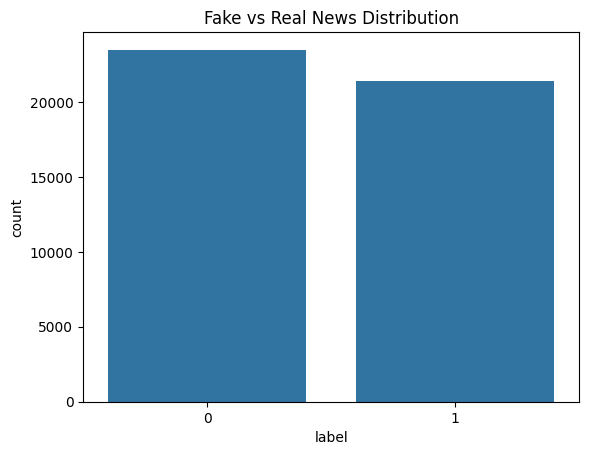

In [4]:
print(data['label'].value_counts())
sns.countplot(x='label', data=data)
plt.title("Fake vs Real News Distribution")
plt.show()


In [5]:
data['content'] = data['title'] + " " + data['text']
data = data[['content', 'label']]

print("Total samples:", data.shape[0])
data.head()


Total samples: 44898


,content,label
0,Protesters gather in Kiev after police recaptu...,1
1,At least 17 killed in Cameroon separatist clas...,1
2,#CNNBlackmails Private Citizen! Threatens to E...,0
3,Donald Trump Can’t Even Control His Temper In...,0
4,WATCH: Fox News A-Hole Spends Tax Day Shaming...,0


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    data['content'], data['label'], test_size=0.2, random_state=42, stratify=data['label']
)
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 35918
Testing samples: 8980


In [7]:
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [8]:
model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=200)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      4696
           1       0.98      0.99      0.98      4284

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



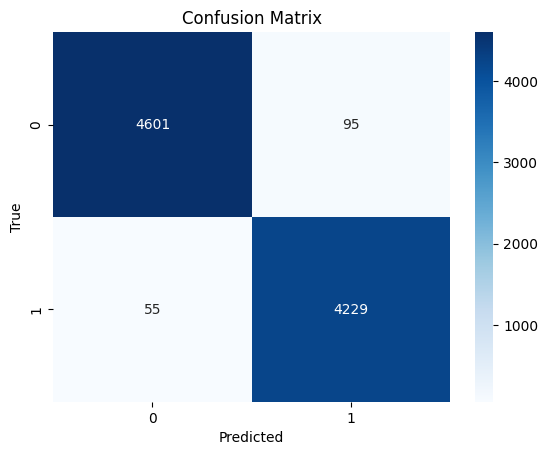

In [9]:
y_pred = model.predict(X_test_tfidf)

print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [10]:
def predict_news(text):
    text_tfidf = tfidf.transform([text])
    prediction = model.predict(text_tfidf)[0]
    if prediction == 0:
        print("📰 The news is **FAKE**.")
    else:
        print("✅ The news is **REAL**.")

# Try some examples
predict_news("The Prime Minister announced that aliens landed in Delhi today.")
predict_news("NASA successfully launched a new satellite for weather observation.")


📰 The news is **FAKE**.
📰 The news is **FAKE**.


In [11]:
joblib.dump(model, "fake_news_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")
print("✅ Model and vectorizer saved successfully.")


✅ Model and vectorizer saved successfully.


In [12]:
loaded_model = joblib.load("fake_news_model.pkl")
loaded_vectorizer = joblib.load("tfidf_vectorizer.pkl")

sample = "Government announced new policy for digital education."
sample_vec = loaded_vectorizer.transform([sample])
pred = loaded_model.predict(sample_vec)[0]
print("Prediction:", "REAL" if pred == 1 else "FAKE")


Prediction: REAL


In [13]:
feature_names = np.array(tfidf.get_feature_names_out())
coefficients = model.coef_[0]
top_fake = feature_names[np.argsort(coefficients)[:20]]
top_real = feature_names[np.argsort(coefficients)[-20:]]

print("Top words indicating FAKE news:\n", top_fake)
print("\nTop words indicating REAL news:\n", top_real)


Top words indicating FAKE news:
 ['video' 'just' 'image' 'hillary' 'featured' 'gop' 'read' 'watch' 'com'
 'america' 'mr' 'getty' 'pic' 'like' 'images' 'breaking' 'american' 'wire'
 '21st' 'https']

Top words indicating REAL news:
 ['killed' 'london' 'year' 'told' 'democratic' 'reporters' 'statement'
 'comment' 'minister' 'spokesman' 'nov' 'presidential' 'monday' 'friday'
 'tuesday' 'republican' 'thursday' 'wednesday' 'washington' 'reuters']


In [14]:
import sys
!{sys.executable} -m pip install flask


Defaulting to user installation because normal site-packages is not writeable


In [15]:
!flask --version


Python 3.13.5
Flask 3.1.2
Werkzeug 3.1.3
